In [1]:
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
import requests
import matplotlib.pyplot as plt

In [2]:
top_20 = ['Atlanta', 'Austin', 'Boston', 'Chicago', 'Columbus', 'Dallas', 'Denver', 'Indianapolis', 'Los Angeles', 'Miami', 'Montgomery County', 'Nashville', 'Newark', 'New York', 'Northern Virginia', 'Philadelphia', 'Pittsburgh', 'Raleigh', 'Toronto', 'Washington']	

# Population Data

In [3]:
url = 'https://en.wikipedia.org/wiki/List_of_United_States_cities_by_population'

In [4]:
tables = pd.read_html(url)

In [5]:
df = tables[4]

In [6]:
df.columns = df.iloc[0]
df.head()

,2017rank,City,State[5],2017estimate,2010Census,Change,2016 land area,2016 population density,Location,nan,nan
0,2017rank,City,State[5],2017estimate,2010Census,Change,2016 land area,2016 population density,Location,NaN,NaN
1,1,New York[6],New York,8622698,8175133,+5.47%,301.5 sq mi,780.9 km2,"28,317/sq mi","10,933/km2",40°39′49″N 73°56′19″W﻿ / ﻿40.6635°N 73.9387°W
2,2,Los Angeles,California,3999759,3792621,+5.46%,468.7 sq mi,"1,213.9 km2","8,484/sq mi","3,276/km2",34°01′10″N 118°24′39″W﻿ / ﻿34.0194°N 118.4108°W
3,3,Chicago,Illinois,2716450,2695598,+0.77%,227.3 sq mi,588.7 km2,"11,900/sq mi","4,600/km2",41°50′15″N 87°40′54″W﻿ / ﻿41.8376°N 87.6818°W
4,4,Houston[7],Texas,2312717,2100263,+10.12%,637.5 sq mi,"1,651.1 km2","3,613/sq mi","1,395/km2",29°47′12″N 95°23′27″W﻿ / ﻿29.7866°N 95.3909°W


In [7]:
df = df.drop(index=0)

In [8]:
df.reset_index(drop=True, inplace=True)

In [9]:
df_top_20 = df[df['City'].str.contains(('|').join(top_20))]
df_top_20 = df_top_20.drop(index=18)

In [10]:
df_top_20.head()

,2017rank,City,State[5],2017estimate,2010Census,Change,2016 land area,2016 population density,Location,nan,nan
0,1,New York[6],New York,8622698,8175133,+5.47%,301.5 sq mi,780.9 km2,"28,317/sq mi","10,933/km2",40°39′49″N 73°56′19″W﻿ / ﻿40.6635°N 73.9387°W
1,2,Los Angeles,California,3999759,3792621,+5.46%,468.7 sq mi,"1,213.9 km2","8,484/sq mi","3,276/km2",34°01′10″N 118°24′39″W﻿ / ﻿34.0194°N 118.4108°W
2,3,Chicago,Illinois,2716450,2695598,+0.77%,227.3 sq mi,588.7 km2,"11,900/sq mi","4,600/km2",41°50′15″N 87°40′54″W﻿ / ﻿41.8376°N 87.6818°W
5,6,Philadelphia[8],Pennsylvania,1580863,1526006,+3.59%,134.2 sq mi,347.6 km2,"11,683/sq mi","4,511/km2",40°00′34″N 75°08′00″W﻿ / ﻿40.0094°N 75.1333°W
8,9,Dallas,Texas,1341075,1197816,+11.96%,340.9 sq mi,882.9 km2,"3,866/sq mi","1,493/km2",32°47′36″N 96°45′59″W﻿ / ﻿32.7933°N 96.7665°W


In [11]:
df_top_20['2017estimate'] = pd.to_numeric(df_top_20['2017estimate'])

In [12]:
for city in top_20:
    df_top_20.loc[df_top_20['City'].str.contains(city, case=False), 'City'] = city

In [13]:
df_top_20 = df_top_20[['City','2017estimate']]

In [14]:
df_top_20

,City,2017estimate
0,New York,8622698
1,Los Angeles,3999759
2,Chicago,2716450
5,Philadelphia,1580863
8,Dallas,1341075
10,Austin,950715
13,Columbus,879170
15,Indianapolis,863002
19,Washington,693972
20,Boston,685094


In [15]:
# Set the index to City
df_top_20.set_index('City', drop=True, inplace=True)

In [16]:
# Now we will add missing areas:
# Montgomery County, source: https://en.wikipedia.org/wiki/Montgomery_County,_Maryland
df_top_20.loc['Montgomery County'] = 1058810
# Norther Virginia, source: https://en.wikipedia.org/wiki/Northern_Virginia
# This uses 2013 data, whereas all other data is 2017
df_top_20.loc['Northern Virginia'] = 2775354
# Toronto, source: https://en.wikipedia.org/wiki/Toronto
df_top_20.loc['Toronoto'] = 2731571

# let's simplify the population columns:
df_top_20['2017estimate'] = (df_top_20['2017estimate']/1000000)

## Analysis and Visualization

In [35]:
# Now that we have an overview let's set up a colormap
import seaborn as sns

# Create the color map based on the unique State names using seaborn presets
color_labels = df_top_20.index.unique()
rgb_values = sns.color_palette("Set2", len(df_top_20.index.unique()))
color_map = dict(zip(color_labels, rgb_values))

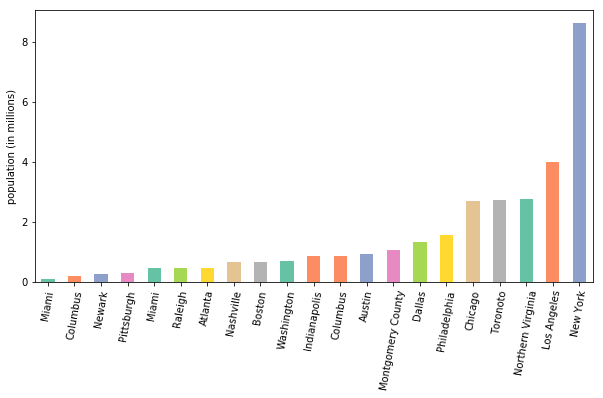

In [36]:
df_top_20 = df_top_20.sort_values(by='2017estimate')

df_top_20.plot.bar(y='2017estimate', color=df_top_20.index.map(color_map), rot=80, legend=False, figsize=(10,5))
plt.ylabel('population (in millions)')
plt.xlabel(None)

plt.savefig('Charts/Population_in_millions.png', bbox_inches='tight')

plt.show()

# BLS Unemployment Stats

In [19]:
# Unemployment by City
bls_url = 'https://www.bls.gov/web/metro/laummtrk.htm'
bls_list = pd.read_html(bls_url)

In [20]:
# Unemployment Rate by State
bls_df = bls_list[0]
bls_df = bls_df.drop(index=51)

In [21]:
bls_df.head()

,Metropolitan area,December 2018(p)rate,Rank
0,United States,3.7,NaN
1,NaN,NaN,NaN
2,"Ames, IA Metropolitan Statistical Area",1.4,1.0
3,"Burlington-South Burlington, VT Metropolitan N...",1.8,2.0
4,"Iowa City, IA Metropolitan Statistical Area",1.8,2.0


In [22]:
bls_df.dropna(inplace=True)
bls_df[bls_df['Metropolitan area'].str.contains('rock', case=False)]

,Metropolitan area,December 2018(p)rate,Rank
151,"Little Rock-North Little Rock-Conway, AR Metro...",3.3,137.0
292,"Davenport-Moline-Rock Island, IA-IL Metropolit...",4.5,285.0
333,"Rocky Mount, NC Metropolitan Statistical Area",5.0,325.0
373,"Rockford, IL Metropolitan Statistical Area",6.3,370.0


In [23]:
bls_top_20 = bls_df[bls_df['Metropolitan area'].str.contains(('|').join(top_20), case=False)]

In [24]:
bls_top_20.reset_index(drop=True, inplace=True)

In [25]:
for city in top_20:
    bls_top_20.loc[bls_top_20['Metropolitan area'].str.contains(city, case=False), 'Metropolitan area'] = city
    
bls_top_20.head()

/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


,Metropolitan area,December 2018(p)rate,Rank
0,Nashville,2.3,16.0
1,Boston,2.4,21.0
2,Columbus,2.5,28.0
3,Washington,2.9,80.0
4,Indianapolis,3.1,103.0


In [26]:
# Rename column
bls_top_20.rename(columns={'December 2018(p)rate': '2018 Rate'}, inplace=True)
bls_top_20

/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:3781: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)


,Metropolitan area,2018 Rate,Rank
0,Nashville,2.3,16.0
1,Boston,2.4,21.0
2,Columbus,2.5,28.0
3,Washington,2.9,80.0
4,Indianapolis,3.1,103.0
5,Dallas,3.3,137.0
6,Miami,3.3,137.0
7,Raleigh,3.3,137.0
8,Atlanta,3.6,181.0
9,Newark,3.6,181.0


/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


Washington
20
['Atlanta', 'Austin', 'Boston', 'Chicago', 'Columbus', 'Dallas', 'Denver', 'Indianapolis', 'Los Angeles', 'Miami', 'Montgomery County', 'Nashville', 'Newark', 'New York', 'Northern Virginia', 'Philadelphia', 'Pittsburgh', 'Raleigh', 'Toronto', 'Washington']
   Metropolitan area  2018 Rate   Rank
8            Atlanta        3.6  181.0
1             Boston        2.4   21.0
13           Chicago        4.0  239.0
14          Columbus        4.0  239.0
5             Dallas        3.3  137.0
10            Denver        3.7  194.0
4       Indianapolis        3.1  103.0
15       Los Angeles        4.2  264.0
6              Miami        3.3  137.0
0          Nashville        2.3   16.0
9             Newark        3.6  181.0
11      Philadelphia        3.7  194.0
12        Pittsburgh        3.9  226.0
7            Raleigh        3.3  137.0
3         Washington        2.9   80.0


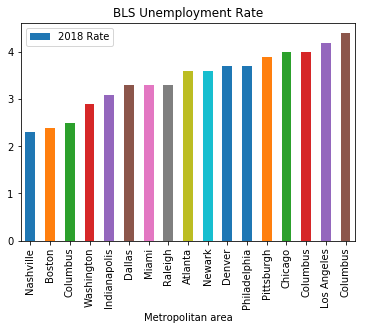

In [27]:
bls_top_20.dropna()
bls_top_20.set_index('Metropolitan area').plot.bar(y='2018 Rate', title='BLS Unemployment Rate')

# Drop the redundant Columbus cities
bls_top_20.drop(index=[2, 16], inplace=True)
if city not in bls_top_20['Metropolitan area']:
    print(city)
    
print(len(top_20))
print(top_20)
print(bls_top_20.sort_values(by='Metropolitan area'))
# Some cities are missing...

In [28]:
bls_top_20.set_index('Metropolitan area', drop=True, inplace=True)

In [29]:
bls_top_20.rename(index={'Newark': 'New York/Newark'}, inplace=True)

In [30]:
# Let's drop the useless rank column
bls_top_20.drop(columns='Rank', inplace=True)

In [31]:
# Adding Austin 
bls_top_20.loc['Austin','2018 Rate'] = 2.7
# rate of arlington-washington area = 2.9 and rate of baltimore area = 3.5
# So for northern virginia we use the average
bls_top_20.loc['Northern Virginia','2018 Rate'] = (2.9 + 3.5)/2 
# Montomery county is so close to Philadelphia we will assign the same unemployment rate
bls_top_20.loc['Montgomery County','2018 Rate'] = 3.7 
# Adding toronto, Dec 2018: https://www150.statcan.gc.ca/t1/tbl1/en/tv.action?pid=1410029401
bls_top_20.loc['Toronto','2018 Rate'] = 6.0 

print(bls_top_20)

                   2018 Rate
Metropolitan area           
Nashville                2.3
Boston                   2.4
Washington               2.9
Indianapolis             3.1
Dallas                   3.3
Miami                    3.3
Raleigh                  3.3
Atlanta                  3.6
New York/Newark          3.6
Denver                   3.7
Philadelphia             3.7
Pittsburgh               3.9
Chicago                  4.0
Columbus                 4.0
Los Angeles              4.2
Austin                   2.7
Northern Virginia        3.2
Montgomery County        3.7
Toronto                  6.0


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


## Analysis and Visualization

In [58]:
# Now that we have an overview let's set up a colormap
import seaborn as sns

# Create the color map based on the unique State names using seaborn presets
color_labels = bls_top_20.index.unique()
rgb_values = sns.color_palette("Set2", len(bls_top_20.index.unique()))
color_map = dict(zip(color_labels, rgb_values))

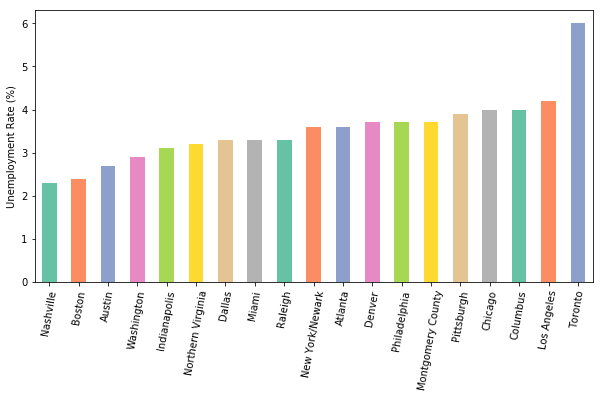

In [40]:
# Finally, let's plot the unemployment rate:
bls_top_20 = bls_top_20.sort_values(by='2018 Rate')
bls_top_20.plot.bar(y='2018 Rate', legend=False, rot=80, color=bls_top_20.index.map(color_map), figsize=(10,5))
# df_top_20.plot.bar(y='2017estimate', color=df_top_20.index.map(color_map), rot=80, legend=False, figsize=(10,5))

# Some formatting
plt.xlabel(None)
plt.ylabel('Unemployment Rate (%)')

plt.savefig('Charts/unemployment_rate.png', bbox_inches='tight')
plt.show()


In [41]:
# Checking if any cities were missed
# NY/ Newark are lumped together by the data
# We assumed montgomery county had the same unemployment rate as Philly
for city in top_20:
    if city not in bls_top_20.index:
        print(city)
        
# Good to go!

Newark
New York


## Experiment to see how these two would look stacked

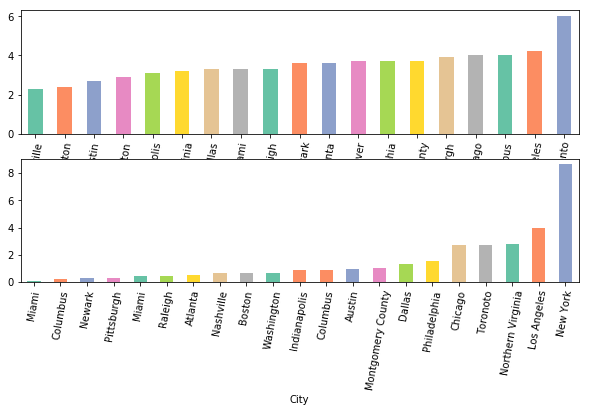

In [59]:
fig, axarr = plt.subplots(2)
bls_top_20.plot.bar(ax=axarr[0], y='2018 Rate', legend=False, rot=80, color=bls_top_20.index.map(color_map), figsize=(10,5))


# Create the color map based on the unique State names using seaborn presets
color_labels = df_top_20.index.unique()
rgb_values = sns.color_palette("Set2", len(df_top_20.index.unique()))
color_map = dict(zip(color_labels, rgb_values))

df_top_20.plot.bar(ax=axarr[1], y='2017estimate', color=df_top_20.index.map(color_map), rot=80, legend=False, figsize=(10,5))
